# Plot fig. 7.18

- figure contact: Masa Watanabe
- This notebook should not depend on anything else in the AR6 package, so it comes quite early in the sequence.

In [1]:
import matplotlib.pyplot as pl
import numpy as np
from numpy import cos, sin
import scipy.stats as st
from scipy.optimize import minimize
import matplotlib

In [2]:
pl.rcParams['figure.figsize'] = (9/2.54, 11/2.54)
pl.rcParams['font.size'] = 11
pl.rcParams['font.family'] = 'Arial'
pl.rcParams['xtick.direction'] = 'out'

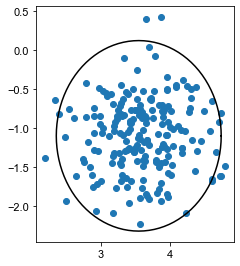

In [3]:
# create distribiutions of (ERF, lambda)
mu = {
    'CMIP5' : {
        'ERF'    : 3.55,
        'lambda' : -1.1
    },
    'Process Assessment': {
        #'ERF'    : 3.7,
        #'lambda' : -1.37
        'ERF'    : 4.00,
        'lambda' : -1.23,
    }
}

sigma = {
    'CMIP5' : {
        'ERF'    : 0.49,
        'lambda' : 0.5
    },
    'Process Assessment' : {
#        'ERF'    : 0.3,
#        'lambda' : 0.42
        'ERF'    : 0.48,
        'lambda' : 0.422,
    }
}


# equation of confidence region: from http://www.visiondummy.com/2014/04/draw-error-ellipse-representing-covariance-matrix/
# suitable when covariance is zero
chi2_crit = st.chi2.ppf(0.95, df=2)
theta        = np.linspace(0, 2*np.pi,101)
ellipse_x_r  = sigma['CMIP5']['ERF']*np.sqrt(chi2_crit)*cos(theta) + mu['CMIP5']['ERF'];
ellipse_y_r  = sigma['CMIP5']['lambda']*np.sqrt(chi2_crit)*sin(theta) + mu['CMIP5']['lambda'];
pl.plot(ellipse_x_r, ellipse_y_r, color='k')

cmip5 = st.multivariate_normal([mu['CMIP5']['ERF'], mu['CMIP5']['lambda']], np.diag([sigma['CMIP5']['ERF'], sigma['CMIP5']['lambda']])**2)
s = cmip5.rvs(size=200)
pl.scatter(s[:,0], s[:,1])

In [4]:
ERF_CMIP5_Forster2013 = np.array(
    [2.98, 3.23, 3.55, 3.84, 3.57, 3.72, 2.59, 3.85, 2.99, 3.09, 3.36, 3.81,
     3.78, 2.93, 2.98, 3.1,  2.66, 4.13, 4.26, 4.09, 4.31, 3.25, 3.11])
lambda_CMIP5_Forster2013 = -1 * np.array(
    [0.78, 1.14, 1.24, 1.04, 1.23, 1.14, 0.63, 0.92, 0.75, 1.29, 1.38, 1.65,
     1.79, 0.64, 1.43, 0.75, 1.02, 1.52, 0.91, 1.13, 1.25, 1.25, 1.11])

# Reference: https://www.nature.com/articles/s41558-018-0272-0
ERF_CMIP5_Watanabe2018 = np.array(
    [2.915, 2.86, 3.22, 3.38, 3.77, 3.64, 3.685, 3.765, 2.55,
     2.845, 2.965, 3.0, 3.355, 3.77, 3.61, 2.91, 3.015, 3.07,
     3.265, 2.625, 4.095, 4.045, 4.045, 4.22, 3.26, 3.095])
lambda_CMIP5_Watanabe2018 = np.array(
    [-0.75, -0.804, -1.13, -1.153, -1.029, -1.232, -1.13, -1.1, -0.611,
     -0.845, -0.744, -1.238, -1.376, -1.6, -1.669, -0.631, -1.46, -0.739,
     -0.787, -1.007, -1.501, -1.108, -1.164, -1.215, -1.253, -1.104])
ECS_CMIP5_Watanabe2018 = np.array(
    [3.887, 3.557, 2.850, 2.931, 3.664, 2.955, 3.261, 3.423, 4.173,
     3.367, 3.985, 2.423, 2.438, 2.356, 2.163, 4.612, 2.065, 4.154,
     4.149, 2.607, 2.728, 3.651, 3.475, 3.473, 2.602, 2.803])

ERF_CMIP6_Zelinka2020 = np.array(
    [3.10, 3.01, 4.17, 3.26, 3.30, 3.64, 3.96, 2.97, 3.68,
     3.33, 3.31, 3.37, 4.17, 3.19, 3.94, 3.53, 3.49, 2.70,
     3.41, 4.11, 3.65, 3.65, 3.43, 3.62, 3.44, 3.89, 3.61]
    )
lambda_CMIP6_Zelinka2020 = np.array(
    [-1.03, -0.92, -1.82, -0.63, -0.71, -0.74, -0.92, -0.62, -0.65,
     -0.63, -0.81, -0.78, -1.40, -0.82, -1.45, -1.13, -0.63, -1.48,
     -0.75, -1.54, -1.40, -1.22, -1.10, -0.76, -1.34, -1.05, -0.67]
    )


mu = {
    'CMIP5' : {
        'ERF'    : np.mean(ERF_CMIP5_Watanabe2018),
        'lambda' : np.mean(lambda_CMIP5_Watanabe2018),
        'ECS'    : np.mean(ECS_CMIP5_Watanabe2018)
    },
    'CMIP6' : {
        'ERF'    : np.mean(ERF_CMIP6_Zelinka2020),
        'lambda' : np.mean(lambda_CMIP6_Zelinka2020)
    },
    'Process Assessment': {
        'ERF'    : 4.00,
        'lambda' : -1.1608,
    }
}

sigma = {
    'CMIP5' : {
        'ERF'    : np.std(ERF_CMIP5_Watanabe2018),
        'lambda' : np.std(lambda_CMIP5_Watanabe2018),
        'ECS'    : np.std(ECS_CMIP5_Watanabe2018)
    },
    'CMIP6' : {
        'ERF'    : np.std(ERF_CMIP6_Zelinka2020),
        'lambda' : np.std(lambda_CMIP6_Zelinka2020)
    },
    'Process Assessment' : {
#        'ERF'    : 0.3,
#        'lambda' : 0.42
        'ERF'    : 0.304,
        'lambda' : 0.396548353,
    }
}

CMIP5_Watanabe2018_cov = np.cov((ERF_CMIP5_Watanabe2018, lambda_CMIP5_Watanabe2018))
CMIP6_Zelinka2020_cov = np.cov((ERF_CMIP6_Zelinka2020, lambda_CMIP6_Zelinka2020))

# objective: 90% confidence ellipse for joint process assessment distribution
# with the same correlation coefficient as for the CMIP5 data

corrcoef = np.corrcoef((ERF_CMIP5_Watanabe2018, lambda_CMIP5_Watanabe2018))
corrcoef = np.corrcoef((ERF_CMIP6_Zelinka2020, lambda_CMIP6_Zelinka2020))
# construct a covariance matrix with the diagonals as the variance of process assessment and the off-diagonals being 
# rho = cov / sigma(x)sigma(y)
# cov = rho * sigma(x)sigma(y)   <---- this!
pcov = corrcoef[1,0]*(sigma['Process Assessment']['ERF']*sigma['Process Assessment']['lambda'])
process_cov = np.array(([sigma['Process Assessment']['ERF']**2, pcov],[pcov, sigma['Process Assessment']['lambda']**2]))

cmip5_uncorrelated = st.multivariate_normal([mu['CMIP5']['ERF'], mu['CMIP5']['lambda']], np.diag([sigma['CMIP5']['ERF'], sigma['CMIP5']['lambda']])**2)
cmip5_correlated = st.multivariate_normal([mu['CMIP5']['ERF'], mu['CMIP5']['lambda']], CMIP5_Watanabe2018_cov)
cmip5_ecs_dist = st.norm(loc=mu['CMIP5']['ECS'], scale=sigma['CMIP5']['ECS'])
process_uncorrelated = st.multivariate_normal([mu['Process Assessment']['ERF'], mu['Process Assessment']['lambda']], np.diag([sigma['Process Assessment']['ERF'], sigma['Process Assessment']['lambda']])**2)
process_correlated = st.multivariate_normal([mu['Process Assessment']['ERF'], mu['Process Assessment']['lambda']], process_cov)


(array([7.2000e+01, 1.0500e+02, 2.5600e+02, 5.4000e+02, 9.9800e+02,
        1.8420e+03, 3.4130e+03, 5.4000e+03, 8.7460e+03, 1.3561e+04,
        2.0124e+04, 2.8436e+04, 3.7907e+04, 4.8534e+04, 5.9853e+04,
        6.9838e+04, 7.8296e+04, 8.3920e+04, 8.4852e+04, 8.3516e+04,
        7.7414e+04, 6.8880e+04, 5.8020e+04, 4.7669e+04, 3.6923e+04,
        2.7320e+04, 1.9375e+04, 1.3283e+04, 8.7690e+03, 5.4000e+03,
        3.0600e+03, 1.7440e+03, 9.7300e+02, 4.7000e+02, 2.2900e+02,
        1.2500e+02, 5.8000e+01, 2.9000e+01, 8.0000e+00, 3.0000e+00]),
 array([1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7,
        2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4. ,
        4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5. , 5.1, 5.2, 5.3,
        5.4, 5.5]),
 <a list of 40 Patch objects>)

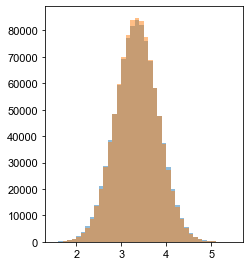

In [5]:
# do marginal PDFs look the same?
rv_cor = cmip5_correlated.rvs(size=1000000)
rv_unc = cmip5_uncorrelated.rvs(size=1000000)
rv_pco = process_correlated.rvs(size=1000000)
rv_pun = process_uncorrelated.rvs(size=1000000)

pl.hist(rv_cor[:,0], alpha=0.5, bins=np.arange(1.5,5.6,0.1))
pl.hist(rv_unc[:,0], alpha=0.5, bins=np.arange(1.5,5.6,0.1))

[2.24518957 2.51539366 3.0640697  3.93459286 4.89509536]
[1.96428232 2.32412997 3.06456656 4.24975129 5.56046486]
[2.27423737 2.62544806 3.44145082 5.06031382 7.39909624]
[2.14991595 2.53797604 3.43811177 5.23179656 7.83545177]


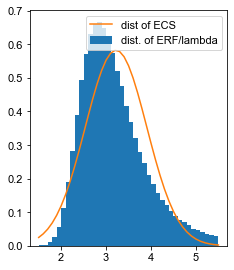

In [6]:
ecs_inferred = rv_cor[:,0]/-rv_cor[:,1]
ecs_unc_inferred = rv_unc[:,0]/-rv_unc[:,1]
ecs_proc_inferred = rv_pco[:,0]/-rv_pco[:,1]
ecs_procunc_inferred = rv_pun[:,0]/-rv_pun[:,1]
pl.hist(ecs_inferred, bins=np.arange(1.5,5.6,0.1), label='dist. of ERF/lambda', density=True)
pl.plot(np.arange(1.5,5.6,0.1), cmip5_ecs_dist.pdf(np.arange(1.5,5.6,0.1)), label='dist of ECS')
pl.legend()
print ((np.percentile(ecs_inferred, [5,16,50,84,95])))
print (np.percentile(ecs_unc_inferred, [5,16,50,84,95]))
print (np.percentile(ecs_proc_inferred, [5,16,50,84,95]))
print (np.percentile(ecs_procunc_inferred, [5,16,50,84,95]))

ppci = np.percentile(ecs_inferred, [5,16,50,84,95])
ppui = np.percentile(ecs_unc_inferred, [5,16,50,84,95])
ppcp = np.percentile(ecs_proc_inferred, [5,16,50,84,95])
ppup = np.percentile(ecs_procunc_inferred, [5,16,50,84,95])

In [7]:
def confidence_region(x, y, ntheta=101, conf=0.95, cov=np.eye(2)):
    "calculate x and y points to plot 2D confidence region"
    mean_x = np.mean(x)
    mean_y = np.mean(y)
    eigval, eigvec = np.linalg.eig(cov)
    eigval_max = np.max(eigval)
    eigval_min = np.min(eigval)
    loc_max = np.argmax(eigval)
    loc_min = np.argmin(eigval)
    alpha = np.arctan2(eigvec[1,loc_max], eigvec[0,loc_max])
    chi2_crit = st.chi2.ppf(conf, df=2)
    theta = np.linspace(0, 2*np.pi, ntheta)
    a            = np.sqrt(eigval_max)*np.sqrt(chi2_crit)
    b            = np.sqrt(eigval_min)*np.sqrt(chi2_crit)
    print (a, b)
    ellipse_x_r  = a*np.cos(theta)
    ellipse_y_r  = b*np.sin(theta)
    rotation     = np.array([[np.cos(alpha), np.sin(alpha)],[-np.sin(alpha), np.cos(alpha)]])
    r_ellipse    = np.matmul(np.array([ellipse_x_r, ellipse_y_r]).T, rotation)
    x_points     = r_ellipse[:,0] + mean_x
    y_points     = r_ellipse[:,1] + mean_y
    return x_points, y_points

In [8]:
def confidence_from_distribution(mu, cov, conf=0.95, ntheta=101):
    "get confidence ellipse from mu and covariance matrices"
    eigval, eigvec = np.linalg.eig(cov)
    eigval_max = np.max(eigval)
    eigval_min = np.min(eigval)
    loc_max = np.argmax(eigval)
    loc_min = np.argmin(eigval)
    alpha = np.arctan2(eigvec[1,loc_max], eigvec[0,loc_max])
    chi2_crit = st.chi2.ppf(conf, df=2)
    theta = np.linspace(0, 2*np.pi, ntheta)
    a            = np.sqrt(eigval_max)*np.sqrt(chi2_crit)
    b            = np.sqrt(eigval_min)*np.sqrt(chi2_crit)
    print (a, b)
    ellipse_x_r  = a*np.cos(theta)
    ellipse_y_r  = b*np.sin(theta)
    rotation     = np.array([[np.cos(alpha), np.sin(alpha)],[-np.sin(alpha), np.cos(alpha)]])
    r_ellipse    = np.matmul(np.array([ellipse_x_r, ellipse_y_r]).T, rotation)
    x_points     = r_ellipse[:,0] + mu[0]
    y_points     = r_ellipse[:,1] + mu[1]
    return x_points, y_points

In [9]:
def ellipse_params(mu, cov, conf=0.95):
    """Return the a, b and alpha parameters for the ellipse
    (x cos alpha + y sin alpha)**2/a**2 + (x sin alpha - y cos alpha)**2/b**2 = 1
    """
    eigval, eigvec = np.linalg.eig(cov)
    eigval_max = np.max(eigval)
    eigval_min = np.min(eigval)
    loc_max = np.argmax(eigval)
    loc_min = np.argmin(eigval)
    alpha = np.arctan2(eigvec[1,loc_max], eigvec[0,loc_max])
    chi2_crit = st.chi2.ppf(conf, df=2)
    a            = np.sqrt(eigval_max)*np.sqrt(chi2_crit)
    b            = np.sqrt(eigval_min)*np.sqrt(chi2_crit)
    return a, b, alpha

In [10]:
# ECS values at 5%-95% and one-sigma
z95 = st.norm.ppf(0.95)
ECS_crit = mu['CMIP5']['ECS'] + sigma['CMIP5']['ECS'] * np.array([-z95, -1., 0., 1., z95])

In [11]:
def func(x):
    return -cmip5_correlated.pdf([x[0],x[1]])

cmip5_correlated_curve_x95 = np.zeros(71)
cmip5_correlated_curve_y95 = np.zeros(71)
cmip5_correlated_curve_x84 = np.zeros(41)
cmip5_correlated_curve_y84 = np.zeros(41)

for i, ecs in enumerate(np.linspace(ppci[0],ppci[4],71)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    cmip5_correlated_curve_x95[i], cmip5_correlated_curve_y95[i] = minimize(func, (3, -1.1), constraints=cons, bounds=((0, None), (None, 0)))['x']

for i, ecs in enumerate(np.linspace(ppci[1],ppci[3],41)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    cmip5_correlated_curve_x84[i], cmip5_correlated_curve_y84[i] = minimize(func, (3, -1.1), constraints=cons, bounds=((0, None), (None, 0)))['x']

def func(x):
    return -cmip5_uncorrelated.pdf([x[0],x[1]])

cmip5_uncorrelated_curve_x95 = np.zeros(71)
cmip5_uncorrelated_curve_y95 = np.zeros(71)
cmip5_uncorrelated_curve_x84 = np.zeros(41)
cmip5_uncorrelated_curve_y84 = np.zeros(41)

for i, ecs in enumerate(np.linspace(ppui[0],ppui[4],71)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    cmip5_uncorrelated_curve_x95[i], cmip5_uncorrelated_curve_y95[i] = minimize(func, (3, -1.1), constraints=cons, bounds=((0, None), (None, 0)))['x']

for i, ecs in enumerate(np.linspace(ppui[1],ppui[3],41)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    cmip5_uncorrelated_curve_x84[i], cmip5_uncorrelated_curve_y84[i] = minimize(func, (3, -1.1), constraints=cons, bounds=((0, None), (None, 0)))['x']

def func(x):
    return -process_correlated.pdf([x[0],x[1]])

process_correlated_curve_x95 = np.zeros(71)
process_correlated_curve_y95 = np.zeros(71)
process_correlated_curve_x84 = np.zeros(41)
process_correlated_curve_y84 = np.zeros(41)

for i, ecs in enumerate(np.linspace(ppcp[0],ppcp[4],71)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    process_correlated_curve_x95[i], process_correlated_curve_y95[i] = minimize(func, (3, -1.1), constraints=cons, bounds=((0, None), (None, 0)))['x']

for i, ecs in enumerate(np.linspace(ppcp[1],ppcp[3],41)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    process_correlated_curve_x84[i], process_correlated_curve_y84[i] = minimize(func, (3, -1.1), constraints=cons, bounds=((0, None), (None, 0)))['x']

def func(x):
    return -process_uncorrelated.pdf([x[0],x[1]])

process_uncorrelated_curve_x95 = np.zeros(71)
process_uncorrelated_curve_y95 = np.zeros(71)
process_uncorrelated_curve_x84 = np.zeros(41)
process_uncorrelated_curve_y84 = np.zeros(41)

for i, ecs in enumerate(np.linspace(ppup[0],ppup[4],71)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    process_uncorrelated_curve_x95[i], process_uncorrelated_curve_y95[i] = minimize(func, (3, -1.1), constraints=cons, bounds=((0, None), (None, 0)))['x']

for i, ecs in enumerate(np.linspace(ppup[1],ppup[3],41)):
    cons = {'type': 'eq', 'fun': lambda x:  -x[1]*ecs - x[0]}    
    process_uncorrelated_curve_x84[i], process_uncorrelated_curve_y84[i] = minimize(func, (3, -1.6), constraints=cons, bounds=((0, None), (None, 0)))['x']
    
#[ 1.89506535  2.14256085  2.69932929  3.72384317  5.04152611]
#[ 1.74610409  2.03949749  2.69861402  3.90524541  5.47669259]

In [12]:
process_uncorrelated_curve_x84

array([3.9119854 , 3.92224968, 3.93182835, 3.94032047, 3.9485913 ,
       3.95617621, 3.96281347, 3.96912271, 3.97495119, 3.98034009,
       3.98545635, 3.99007101, 3.99422377, 3.99828386, 4.00210041,
       4.00529367, 4.00847007, 4.01142253, 4.01416802, 4.01672206,
       4.01909885, 4.02131138, 4.02337159, 4.02529056, 4.02707861,
       4.02892054, 4.03029764, 4.03172574, 4.03309237, 4.03434847,
       4.03551834, 4.03660813, 4.0376241 , 4.03857074, 4.03962464,
       4.04028949, 4.04079798, 4.04174081, 4.04234197, 4.0427814 ,
       4.043551  ])

In [13]:
def intersect_params(a, b, alpha, m, c, e, f):
    "Find where the line y=mx+c intercepts the ellipse parameterised by a, b and alpha, offset by e and f."
    d = c + (e*m - f)
    A = b**2 * (cos(alpha)**2 + 2*m*cos(alpha)*sin(alpha) + m**2 * sin(alpha)**2) + a**2 * (m**2*cos(alpha)**2 - 2*m*cos(alpha)*sin(alpha) + sin(alpha)**2)
    B = 2*b**2*d*(cos(alpha)*sin(alpha)+m*sin(alpha)**2) + 2*a**2*d*(m*cos(alpha)-cos(alpha)*sin(alpha))
    C = d**2*(b**2*sin(alpha)**2 + a**2*cos(alpha)**2) - a**2*b**2
    x1 = (-B + np.sqrt(B**2 - 4*A*C))/(2*A)
    x2 = (-B - np.sqrt(B**2 - 4*A*C))/(2*A)
    return np.array([[x1 + e, m*(x1+e)+c], [x2 + e, m*(x2+e)+c]])

In [14]:
print (mu['CMIP5']['ERF']/mu['CMIP5']['lambda'], mu['CMIP5']['ECS'])

-3.0646582100070474 3.221230769230769


In [15]:
mu_x = mu['CMIP5']['ERF']
mu_y = mu['CMIP5']['lambda']
point = np.arange(0.05, 0.50, 0.01)

r1 = np.zeros((91,2))
r2 = np.zeros((91,2))
for i, ip in enumerate(point):
    z = st.norm.ppf(ip)
    ECS = mu['CMIP5']['ECS'] + sigma['CMIP5']['ECS']*z
    conf = 1-ip*2.0
    a, b, alpha = ellipse_params([mu_x, mu_y],
                                 np.diag([sigma['CMIP5']['ERF'], sigma['CMIP5']['lambda']])**2,
                                 conf=conf)
    m = -1/ECS
    r1[i,:], r2[i,:] = intersect_params(a, b, alpha, m, 0, mu_x, mu_y)
point = np.arange(0.51, 0.96, 0.01)
for i, ip in enumerate(point):
    z = st.norm.ppf(ip)
    ECS = mu['CMIP5']['ECS'] + sigma['CMIP5']['ECS']*z
    conf = ip*2.0-1
    a, b, alpha = ellipse_params([mu_x, mu_y],
                                 np.diag([sigma['CMIP5']['ERF'], sigma['CMIP5']['lambda']])**2,
                                 conf=conf)
    m = -1/ECS
    r1[i+46,:], r2[i+46,:] = intersect_params(a, b, alpha, m, 0, mu_x, mu_y)
r1[45,:] = [mu_x, mu_y]
r2[45,:] = [mu_x, mu_y]
#print r1, r2#, ECS, z, conf

0.9258649759750792 0.5408615458956556


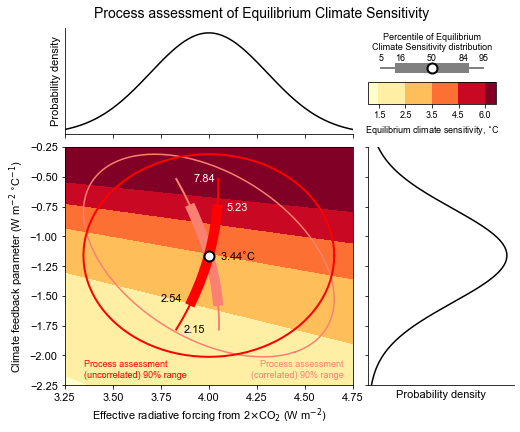

In [26]:
from matplotlib import rc
from matplotlib.ticker import NullFormatter

fig = pl.figure(figsize=(18/2.54,15/2.54))#figsize=(10,8))

# definitions for the axes
left, width = 0.115, 0.565
bottom, height = 0.11, 0.56
left_h = left + width + 0.03
bottom_h = bottom + height + 0.03

x = np.arange(3.25,4.76,0.01)
y = np.arange(-2.25,-0.24,0.01)

rect_joint = [left, bottom, width, height]
rect_marginal_ERF = [left, bottom_h, width, 0.81-height]
rect_marginal_lambda = [left_h, bottom, 0.85-width, height]

ax_joint = pl.axes(rect_joint)
ax_marginal_ERF = pl.axes(rect_marginal_ERF)
ax_marginal_lambda = pl.axes(rect_marginal_lambda)

# top plot
marginal_pdf_process_ERF    = st.norm.pdf(x, loc=mu['Process Assessment']['ERF'], scale=sigma['Process Assessment']['ERF'])
ax_marginal_ERF.plot(x, marginal_pdf_process_ERF, color='black')

# right plot
marginal_pdf_process_lambda = st.norm.pdf(y, loc=mu['Process Assessment']['lambda'], scale=sigma['Process Assessment']['lambda'])
ax_marginal_lambda.plot(marginal_pdf_process_lambda, y, color='black')

# centre plot
X,Y = np.meshgrid(x,y)
Z = -X/Y

cf = ax_joint.contourf(X,Y,Z, levels=[1.5,2.5,3.5,4.5,6], extend='both', cmap=pl.cm.YlOrRd)
cbax = pl.axes([left_h, bottom_h+0.01, 0.25,0.25])
cb = pl.colorbar(cf, ax=cbax, orientation='horizontal', fraction=0.45, aspect=5, extendfrac=0.1, extendrect=True)
cbax.axis('off')
cb.set_label('Equilibrium climate sensitivity, $^{\circ}$C', fontsize=9)
cb.ax.tick_params(labelsize=9)

# get confidence ellipse points
chi2_crit = st.chi2.ppf(0.90, df=2)
theta        = np.linspace(0, 2*np.pi,101)
joint_pdf_process_x  = sigma['Process Assessment']['ERF']*np.sqrt(chi2_crit)*np.cos(theta) + mu['Process Assessment']['ERF'];
joint_pdf_process_y  = sigma['Process Assessment']['lambda']*np.sqrt(chi2_crit)*np.sin(theta) + mu['Process Assessment']['lambda'];

joint_pdf_process_dist_correlated_x, joint_pdf_process_dist_correlated_y = confidence_from_distribution(
    [mu['Process Assessment']['ERF'], mu['Process Assessment']['lambda']], process_cov, conf=0.90)

h_process_dist = ax_joint.plot(
    joint_pdf_process_x, joint_pdf_process_y, color='red', label='Process Assessment (uncorrelated)', zorder=14.5, lw=2)
h_process_dist_correlated = ax_joint.plot(
    joint_pdf_process_dist_correlated_x, joint_pdf_process_dist_correlated_y, color='salmon', label='Process Assessment (correlated)', zorder=14)

# limits and labels
ax_joint.set_xlim(x[0], x[-1])
ax_joint.set_ylim(y[0], y[-1])
ax_marginal_lambda.set_xlim(0, ax_marginal_lambda.get_xlim()[1])
ax_marginal_lambda.set_ylim(y[0], y[-1])
ax_marginal_ERF.set_xlim(x[0], x[-1])
ax_marginal_ERF.set_ylim(0, ax_marginal_ERF.get_ylim()[1])
ax_marginal_lambda.set_xlabel('Probability density')
ax_marginal_ERF.set_ylabel('Probability density')
ax_joint.set_xlabel(r'Effective radiative forcing from 2$\times$CO$_2$ (W m$^{-2}$)')
ax_joint.set_ylabel(r'Climate feedback parameter (W m$^{-2}$ $^{\circ}$C$^{-1}$)')

# spines off
ax_marginal_ERF.spines['right'].set_visible(False)
ax_marginal_ERF.spines['top'].set_visible(False)
ax_marginal_lambda.spines['right'].set_visible(False)
ax_marginal_lambda.spines['top'].set_visible(False)

# legend and annotation
handles, labels = ax_joint.get_legend_handles_labels()
order=[0,1,2]

# no tick labels on marginals
nullfmt = NullFormatter()
ax_marginal_ERF.xaxis.set_major_formatter(nullfmt)
ax_marginal_ERF.yaxis.set_major_formatter(nullfmt)
ax_marginal_ERF.set_yticks([])
ax_marginal_lambda.yaxis.set_major_formatter(nullfmt)
ax_marginal_lambda.xaxis.set_major_formatter(nullfmt)
ax_marginal_lambda.set_xticks([])

# plot CMIP5 model mean - this is correct
ax_joint.scatter(mu['Process Assessment']['ERF'], mu['Process Assessment']['lambda'], s=100, color='white', marker='o', zorder=16, edgecolor='k', lw=2)#, linestyle=':')
ax_joint.plot(process_correlated_curve_x95, process_correlated_curve_y95, color='salmon', lw=2, zorder=11)
ax_joint.plot(process_correlated_curve_x84, process_correlated_curve_y84, color='salmon', lw=10, zorder=11)
ax_joint.plot(process_uncorrelated_curve_x95, process_uncorrelated_curve_y95, color='red', lw=2, zorder=12)
ax_joint.plot(process_uncorrelated_curve_x84, process_uncorrelated_curve_y84, color='red', lw=10, zorder=12)
ax_joint.text(process_uncorrelated_curve_x95[0]+0.04, process_uncorrelated_curve_y95[0]-0.03, '%4.2f'%ppup[0])
ax_joint.text(process_uncorrelated_curve_x84[0]-0.16, process_uncorrelated_curve_y84[0]-0.01, '%4.2f'%ppup[1])
ax_joint.text(mu['Process Assessment']['ERF']+0.06, mu['Process Assessment']['lambda']-0.04, '%4.2f$^{\circ}$C'%ppup[2])
ax_joint.text(process_uncorrelated_curve_x84[-1]+0.05, process_uncorrelated_curve_y84[-1]-0.01, '%4.2f'%ppup[3], color='w')
ax_joint.text(process_uncorrelated_curve_x95[-1]-0.13, process_uncorrelated_curve_y95[-1]-0.02, '%4.2f'%ppup[4], color='w')

# dummy legend for ECS confidence range
lgax = pl.axes([left_h, bottom_h+0.13, 0.25,0.1])
lgax.plot((2.35, 3.15), (-2.1, -2.1), color='gray', lw=2)
lgax.plot((2.5, 3.0), (-2.1, -2.1), color='gray', lw=10)
lgax.scatter(2.75, -2.1, s=100, color='white', marker='o', edgecolor='k', lw=2, zorder=16)
lgax.text(2.35, -2.0, '5', ha='center', va='center', fontsize=9)
lgax.text(2.5, -2.0, '16', ha='center', va='center', fontsize=9)
lgax.text(2.75, -2.0, '50', ha='center', va='center', fontsize=9)
lgax.text(3.0, -2.0, '84', ha='center', va='center', fontsize=9)
lgax.text(3.15, -2.0, '95', ha='center', va='center', fontsize=9)
lgax.text(2.75, -1.85, 'Percentile of Equilibrium\nClimate Sensitivity distribution', ha='center', va='center', fontsize=9)
lgax.set_xlim(2.25,3.25)
lgax.set_ylim(-2.2,-1.8)
lgax.axis('off')

ax_joint.set_xticks(np.arange(np.min(x),np.max(x)+0.01,0.25))
ax_marginal_ERF.set_xticks(np.arange(np.min(x),np.max(x)+0.01,0.25))

ax_joint.text(3.35,-2.20,'Process assessment\n(uncorrelated) 90% range', color='red', va='bottom', ha='left', fontsize=9)
ax_joint.text(4.70,-2.20,'Process assessment\n(correlated) 90% range', color='salmon', va='bottom', ha='right', fontsize=9)

pl.figtext(0.5,0.974,'Process assessment of Equilibrium Climate Sensitivity', fontsize=14, ha='center')

xdum = np.linspace(2.75,5.25)

pl.savefig('../figures/fig7.18.png', dpi=300)
pl.savefig('../figures/fig7.18.pdf')